# Исследование стартапов



### Цель проекта

Провести анализ предоставленных данных, оценить их соответствие здравому смыслу, ответить на вопросы заказчика о значимости данных для бизнеса, выяснить, какие данные могут быть использованы для разработки модели бизнеса. 

### Содержание проекта
Шаг 1. Знакомство с данными: загрузка и первичная предобработка
   - 1.1. Вывод общей информации, исправление названий столбцов
   - 1.2. Названия столбцов датафреймов
   - 1.3. Анализ типов данных в датафреймах
   - 1.4. Смена типов данных и анализ пропусков
       - 1.4.1. Смена типов данных
       - 1.4.2. Анализ пропусков в датасетах

Шаг 2. Предобработка данных, предварительное исследование
   - 2.1. Раунды финансирования по годам
   - 2.2. Люди и их образование
   - 2.3. Объединять или не объединять датафреймы
   - 2.4. Проблемный датасет и причина возникновения пропусков
   
Шаг 3. Исследовательский анализ объединённых таблиц
   - 3.1. Объединение данных
   - 3.2. Анализ выбросов
   - 3.3. Куплены забесплатно?
   - 3.4. Цены стартапов по категориям
   - 3.5. Сколько раундов продержится стартап перед покупкой
   
Шаг 4. Итоговый вывод и рекомендации
   - 4.1. Общий обзор проделанной работы
   - 4.2. Рекомендации на основе анализа данных

## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

### 1.1. Вывод общей информации, исправление названий столбцов

- Загрузим необходимые библиотеки для работы с датасетами: `pandas`, `matplotlib`. 
- Уберем ограничение на отображение количества колонок в таблицах.
- Активируем режим "copy on write"
- Выгрузим данные в переменные acquisition_df, company_df, people_df, education_df, degrees_df.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt

In [2]:
pd.options.mode.copy_on_write = True

In [3]:
acquisition_df = pd.read_csv('acquisition.csv')
company_df = pd.read_csv('company_and_rounds.csv')
people_df = pd.read_csv('people.csv')
education_df = pd.read_csv('education.csv')
degrees_df = pd.read_csv('degrees.csv')

### 1.2. Названия столбцов датафреймов

Выведем названия столбцов в датафреймах на экран.

In [4]:
acquisition_df.columns

Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

In [5]:
company_df.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [6]:
people_df.columns

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

In [7]:
education_df.columns

Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

In [8]:
degrees_df.columns

Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

Проверка названий столбцов показала, что в датафрейме `company_df`:
-  в названиях столбцов содержатся двойные пробелы, которые нужно заменить на нижнее подчеркивание, чтобы привести названия к snake case;
- есть дублирующееся названия столбца, заменим `company_id` на `company_id_2`.

In [9]:
company_df.columns = company_df.columns.str.replace('  ', '_')
company_df.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [10]:
company_df = company_df.rename(columns = {
    'company_ID': 'company_id', 
    'company_id':'company_id_2'
})
company_df.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_2', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

---

### 1.3. Анализ типов данных в датафреймах

Ознакомимся с информацией, содержащейся в датафреймах: выведем первые строки на экран, проверим типы данных.

In [11]:
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [12]:
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


**Датафрейм `acquisition_df`** содержит 6 столбцов и 9407 строк, в которых представлена информация о покупке стартапов. 

После первичного анализа можно сделать следующие выводы:

- названия столбцов соответствуют требуемому стилю.
- данные хранятся в 2 типах данных: `int64`, `object`:
    - **Строковые данные (object)**. 2 столбца представлены данным типом даных (`term_code`, `acquired_at`). Для столбца `acquired_at` это неверный тип данных, его нужно заменить на `datetime64`.
    - **Числовые данные с плавающей запятой (float64)**. 4 столбца представлены этим типом данных (`id`, `acquiring_company_id`, ` acquired_company_id`, `price_amount`). Для всех столбцов это верный тип данных.
    

In [13]:
company_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id_2,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id           217472 non-null  float64
 1   name                 217471 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id_2         52928 non-null   float64
 15  funded_at        

**Датафрейм `company_df`** содержит 22 колонки и 217774 строк, в которых представлена информация о стартапах и сделках. 

После первичного анализа можно сделать следующие выводы:

- названия столбцов соответствуют требуемому стилю.
- данные хранятся в 2 типах данных: `int64`, `object`:
    - **Строковые данные (object)**. 10 столбцов представлены данным типом данных: `name`, `category_code`, `status`, `founded_at`, `closed_at`, `domain`, `network_username`, `country_code`, `funded_at`, `funding_round_type`. В столбцах `founded_at`, `closed_at` и `funded_at` тип данных нужно привести к `datetime64`.
    - **Числовые данные с плавающей запятой (float64)**. 12 столбцов представлены этим типом данных: `company_id `, `investment_rounds`, `funding_rounds`, `funding_total`, `milestones`, `funding_round_id`, ` company_id`, `raised_amount`, `pre_money_valuation`, `participants`, `is_first_round`, `is_last_round`. В данных столбцах содержатся целочисленные данные. Тип данных float64 обусловлен наличием пропусков.

In [15]:
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [16]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


**Датафрейм `people_df`** содержит 5 столбцов и 226709 строк, в котором предcтавлены данные о сотрудниках компаний.

После первичного анализа можно сделать следующие выводы:

- названия столбцов соответствуют требуемому стилю.
- данные хранятся в 3 типах данных: `int64`, `object` и `float64`:
     - **Строковые данные (object)**. 3 столбца представлены этим типом данных: `first_name`, `last_name` и `network_username`. Это верный тип данных.
     - **Числовые данные с плавающей запятой (float64)**. Столбец `company_id` представлен этим типом данных. Здесь должен быть целочисленный тип данных, однако, в данных есть пропуски, поэтому тип данных float64.
     - **Целочисленный тип данных (int64)**. Столбец `id` имеет верный тип данных.

In [17]:
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [18]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


**Датафрейм `education_df`** содержит 4 столбца и 109610 строк, в котором представлена информация об образовании сотруников.

После первичного анализа можно сделать следующие выводы:

- названия столбцов соответствуют требуемому стилю.
- данные хранятся в 2 типах данных: `int64` и `object`:
    - **Целочисленный тип данных (int64)**. Столбцы `id`, `person_id` представлены данным типом данных. Это верный тип данных.
    - **Строковые данные (object)**. Столбцы `instituition`, `graduated_at` представлены этим типом данных. Столбец `graduated_at` нужно привести к типу данных `datetime64`.


In [19]:
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [20]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


**Датафрейм `degrees_df`** содержит 4 столбца и 109610 строк, в котором представлена информация о специальности сотруников.

После первичного анализа можно сделать следующие выводы:

- названия столбцов соответствуют требуемому стилю.
- данные хранятся в 2 типах данных: `int64` и `object`: 
    - **Целочисленный тип данных (int64)**. Столбец `id` представлен данным типом данных. Это верный тип данных.
    - **Строковые данные (object)**. Столбцы `object_id`, `degree_type` и `subject` представлены этип типом данных. Это верный тип данных.

---

### 1.4. Смена типов данных и анализ пропусков

#### 1.4.1. Смена типов данных

В датафрейме `company_df` в столбцах `founded_at`, `closed_at`, `funded_at` необходимо заменить тип данных `object` на `datetime64`

In [21]:
for column in ['founded_at', 'closed_at', 'funded_at']:
    company_df[column] = pd.to_datetime(company_df[column])
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

#### 1.4.2. Анализ пропусков в датасетах

Рассчитаем долю пропусков в датасетах

In [22]:
acquisition_df.isna().mean()

id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
term_code               0.805358
price_amount            0.000000
acquired_at             0.003083
dtype: float64

В датасете `acquisition_df` значительный процент пропусков в столбце `term_code` (варианты расчетов), однако, для целей данного исследования эти данные не имеют значения.

In [23]:
company_df.isna().mean()

company_id             0.001387
name                   0.001391
category_code          0.339288
status                 0.001387
founded_at             0.495091
closed_at              0.984162
domain                 0.324258
network_username       0.561316
country_code           0.501286
investment_rounds      0.001387
funding_rounds         0.001387
funding_total          0.001387
milestones             0.001387
funding_round_id       0.756959
company_id_2           0.756959
funded_at              0.758098
funding_round_type     0.756959
raised_amount          0.756959
pre_money_valuation    0.756959
participants           0.756959
is_first_round         0.756959
is_last_round          0.756959
dtype: float64

В датасете `company_df` высокие показатели пропусков в столбцах `funded_at`(75.8%) и `raised_amount` (75.6%) - в каком году было финансирование и в каком размере были выделены средства, соответственно. Это является значительным ограничением для получения полноценной картины о финансировании компаний.

In [24]:
people_df.isna().mean()

id                  0.000000
first_name          0.000040
last_name           0.000018
company_id          0.847315
network_username    0.828560
dtype: float64

В датасете `people_df` очень высокий процент пропусков в столбце `company_id ` - 84.7%, это значит, что для большей части сотрудников нет информации о том, к какой компании они принадлежат. На основании этих данных невозможно будет провести полноценный анализ о наличии образования у сотрудников и распределении таких сотрудников в компаниях разного размера.

In [25]:
education_df.isna().mean()

id              0.000000
person_id       0.000000
instituition    0.000502
graduated_at    0.470359
dtype: float64

В датасете `education_df` высокий процент пропусков в столбце `graduated_at`. То есть нет достаточных сведений об окончании учебного заведения. Можно предположить, что сотрудник продолжает учебу, бросил ее или в базу данных не были внесены сведения.

In [26]:
degrees_df.isna().mean()

id             0.000000
object_id      0.000000
degree_type    0.102372
subject        0.258298
dtype: float64

В датасете `degrees_df` есть пропуски в столбцах `degree_type`(10.2%) и `subject` (25.8%). Данные о типе образования могут быть использованы для анализа профиля сотрудников.

---

**Промежуточные выводы этапа знакомства с данными**

Судя про предварительно проведенному анализу, данные не являются достаточными для формулирования полноценных выводов на поставленные задачи. Главными ограничениями являются отсутствие большого количества данных о принадлежности сотрудников к определенной компании и высокий процент пропусков в данных о суммах и сроках финансирования.

---

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

На данном этапе необходимо ответить на следующие вопросы:

1. В каком году типичный размер собранных в рамках одного раунда средств был максимален?
2. Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

Последовательность выполнения:

- Используем датасет `company_df`, в который добавим столбец 'year_funded'. 
- Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
- Отфильтруем в сводной таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

In [27]:
company_df['year_funded'] = company_df['funded_at'].dt.year
company_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id_2,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year_funded
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
amounts_grouped = company_df.pivot_table(
    index='year_funded', 
    values='raised_amount', 
    aggfunc={'median', 'count'}).rename(columns={'median':'financing'}).sort_values(by='year_funded', ascending=False).reset_index()
amounts_grouped

,year_funded,count,financing
0,2013.0,11072,1200000.0
1,2012.0,9970,1000000.0
2,2011.0,9204,1200000.0
3,2010.0,6221,1602500.0
4,2009.0,4151,2000000.0
5,2008.0,3774,3110000.0
6,2007.0,3279,3973320.0
7,2006.0,2436,5000000.0
8,2005.0,1633,5500000.0
9,2004.0,291,5000000.0


In [29]:
amounts_filtered = amounts_grouped[amounts_grouped['count'] > 50]
amounts_filtered

,year_funded,count,financing
0,2013.0,11072,1200000.0
1,2012.0,9970,1000000.0
2,2011.0,9204,1200000.0
3,2010.0,6221,1602500.0
4,2009.0,4151,2000000.0
5,2008.0,3774,3110000.0
6,2007.0,3279,3973320.0
7,2006.0,2436,5000000.0
8,2005.0,1633,5500000.0
9,2004.0,291,5000000.0


Преобразуем тип данных в столбцах 'year_funded' и 'financing' в целочисленный и построим линейный график для отображения динамики типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

In [30]:
for column in ['year_funded', 'financing']:
    amounts_filtered[column] = pd.to_numeric(amounts_filtered[column]).astype('int64')
amounts_filtered

,year_funded,count,financing
0,2013,11072,1200000
1,2012,9970,1000000
2,2011,9204,1200000
3,2010,6221,1602500
4,2009,4151,2000000
5,2008,3774,3110000
6,2007,3279,3973320
7,2006,2436,5000000
8,2005,1633,5500000
9,2004,291,5000000


In [31]:
amounts_filtered['financing_thous'] = amounts_filtered['financing'] / 1_000
amounts_filtered

,year_funded,count,financing,financing_thous
0,2013,11072,1200000,1200.00
1,2012,9970,1000000,1000.00
2,2011,9204,1200000,1200.00
3,2010,6221,1602500,1602.50
4,2009,4151,2000000,2000.00
5,2008,3774,3110000,3110.00
6,2007,3279,3973320,3973.32
7,2006,2436,5000000,5000.00
8,2005,1633,5500000,5500.00
9,2004,291,5000000,5000.00


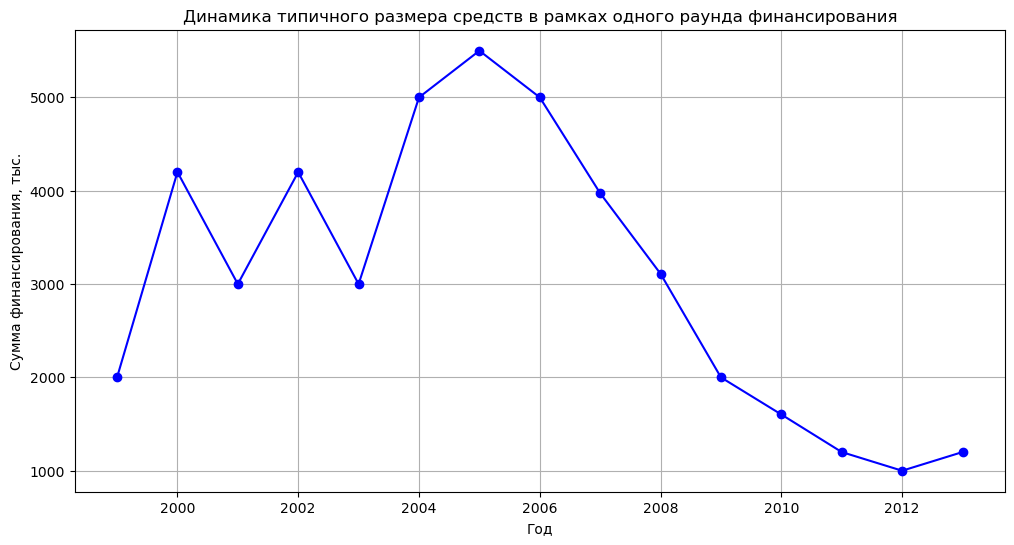

In [32]:
amounts_filtered.plot(
    x='year_funded',
    y='financing_thous',
    figsize=(12, 6),
    style='-o',
    legend=False,
    color='blue',
    grid=True,
    title='Динамика типичного размера средств в рамках одного раунда финансирования'
)

plt.xlabel('Год')
plt.ylabel('Сумма финансирования, тыс.')
plt.show()

---

График показывает, что **средний размер финансирования в рамках одного раунда** был максимальным в 2005 году и составил 5.5 млн у.е., в 2004 и в 2006 годах он составил 5 млн у.е. В 2013 году наблюдалось максимальное количество раундов финансирования - 11 072, средний размер финансирования составил 1.2 млн у.е. (один из самых низких показателей).

--- 
 
### 2.2. Люди и их образование

Необходимо выяснить, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оценим, насколько информация об образовании сотрудников полна, используя датасеты `people.csv` и `education.csv`, разделим все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп. 
- Оценим целесообразность присоединения к этим таблицам таблицы `degrees.csv`.

In [33]:
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [34]:
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [35]:
personnel_df = pd.merge(
    people_df,
    education_df,
    how='left',
    left_on='id',
    right_on='person_id'
)

personnel_df.head()

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaN
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
personnel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_x              267694 non-null  int64  
 1   first_name        267685 non-null  object 
 2   last_name         267690 non-null  object 
 3   company_id        44789 non-null   float64
 4   network_username  50775 non-null   object 
 5   id_y              109056 non-null  float64
 6   person_id         109056 non-null  float64
 7   instituition      109002 non-null  object 
 8   graduated_at      57691 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 18.4+ MB


- из полученного в результате слияния датафрейма удалим дублирующийся столбец 'person_id';
- добавим столбец о наличии образования, т.е. ненулевые значения в столбце 'instituition' или в столбце 'graduated_at;
- посчитаем долю сотрудников с образованием.

In [37]:
personnel_df_new = personnel_df.drop('person_id', axis=1)
personnel_df_new.head()

,id_x,first_name,last_name,company_id,network_username,id_y,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,Harvard University,NaN
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN


In [38]:
personnel_df_new['education'] = personnel_df_new['instituition'].notna() | personnel_df_new['graduated_at'].notna()
personnel_df_new.head()

,id_x,first_name,last_name,company_id,network_username,id_y,instituition,graduated_at,education
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,Harvard University,NaN,True
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,False
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,False
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,False
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,False


In [39]:
personnel_df_new['education'].mean()

0.40731955142812315

In [40]:
personnel_df_new.isna().mean()

id_x                0.000000
first_name          0.000034
last_name           0.000015
company_id          0.832686
network_username    0.810324
id_y                0.592609
instituition        0.592811
graduated_at        0.784489
education           0.000000
dtype: float64

Исследуем численность сотрудников в компаниях: посчитаем, сколько раз количество сотрудников встречается в компаниях и сколько компаний имеют определенное количество сотрудников.

In [41]:
id_counts = personnel_df_new['company_id'].value_counts(ascending=False)
id_counts 

company_id
59.0        376
29.0        221
1242.0      192
231067.0    111
4175.0       89
           ... 
227969.0      1
227971.0      1
227974.0      1
227979.0      1
143419.0      1
Name: count, Length: 22922, dtype: int64

In [42]:
company_sizes = id_counts.value_counts().sort_index()
company_sizes

count
1      14150
2       4735
3       1857
4        831
5        447
6        259
7        161
8        115
9         86
10        51
11        52
12        25
13        26
14        12
15        14
16        12
17         8
18        16
19        10
20         9
21         1
22         3
23         1
24         2
25         4
26         2
27         3
28         1
29         2
30         2
34         2
35         2
39         2
42         1
43         1
44         2
46         1
52         1
59         1
64         1
66         1
70         1
71         1
73         1
80         1
84         1
89         1
111        1
192        1
221        1
376        1
Name: count, dtype: int64

Примерно 2/3 всех компаний имеют численность 1 сотрудник (14150 компаний), в 4735 компаниях в штате 2 сотрудника, количество компаний с численностью более 20 человек незначительно.

Дальнейшая последовательность шагов:
- проведем группировку компаний по количеству сотрудников и наличию образования у этих сотрудников;
- разделим компании на группы по количеству сотрудников;
- рассчитаем процент сотрудников в компаниях, у которых есть образование;
- рассчитаем долю сотрудников с образованием в каждой группе компаний;
- построим столбчатую диаграмму для отображения доли сотрудников с образованием в компаниях.

In [43]:
personnel_grouped = personnel_df_new.groupby('company_id', observed=True).agg({
    'id_x': 'count',
    'education': 'sum'
}).sort_values('id_x', ascending=False).reset_index()
personnel_grouped

,company_id,id_x,education
0,59.0,376,300
1,29.0,221,181
2,1242.0,192,155
3,231067.0,111,97
4,4175.0,89,82
...,...,...,...
22917,68693.0,1,1
22918,68695.0,1,0
22919,68710.0,1,0
22920,68723.0,1,1


In [44]:
personnel_grouped['company_size'] = pd.cut(
    personnel_grouped['id_x'], 
    bins=[0, 1, 2, 3, 5, 10, 25, float('inf')], 
    labels=['1', '2', '3', '4-5', '6-10', '11-25', '26+'])
personnel_grouped.head(10)

,company_id,id_x,education,company_size
0,59.0,376,300,26+
1,29.0,221,181,26+
2,1242.0,192,155,26+
3,231067.0,111,97,26+
4,4175.0,89,82,26+
5,5.0,84,68,26+
6,499.0,80,60,26+
7,4715.0,73,72,26+
8,317.0,71,64,26+
9,494.0,70,50,26+


In [45]:
personnel_grouped['share_edu'] = personnel_grouped['education'] / personnel_grouped['id_x']
personnel_grouped.head(10)

,company_id,id_x,education,company_size,share_edu
0,59.0,376,300,26+,0.797872
1,29.0,221,181,26+,0.819005
2,1242.0,192,155,26+,0.807292
3,231067.0,111,97,26+,0.873874
4,4175.0,89,82,26+,0.921348
5,5.0,84,68,26+,0.809524
6,499.0,80,60,26+,0.750000
7,4715.0,73,72,26+,0.986301
8,317.0,71,64,26+,0.901408
9,494.0,70,50,26+,0.714286


In [46]:
personnel_edu = personnel_grouped.groupby('company_size', observed=True).agg({
    'share_edu': 'mean'
}).sort_values(by='company_size', ascending=True)
personnel_edu

,share_edu
company_size,
1,0.407633
2,0.773284
3,0.772393
4-5,0.724257
6-10,0.688065
11-25,0.693480
26+,0.795419


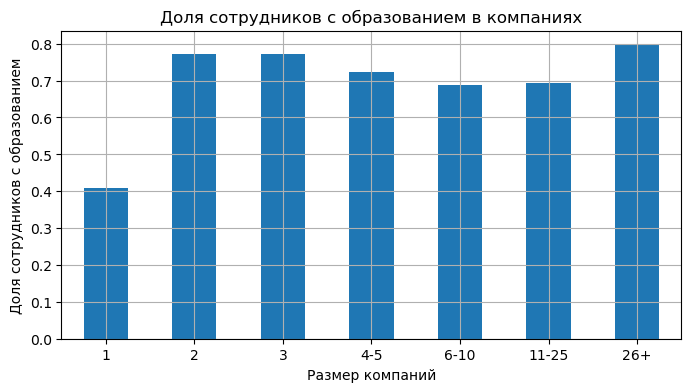

In [47]:
personnel_edu.plot(
    kind='bar', 
    figsize=(8, 4),
    title='Доля сотрудников с образованием в компаниях',
    legend=False,
    xlabel='Размер компаний',
    ylabel='Доля сотрудников с образованием',
    rot=0
)
plt.grid()                  
plt.show()

---

**Образование сотрудников в компаниях**

- Самый низкий показатель наличия сведений об образовании сотрудников характерен для компаний с численностью 1 человек (40.8%). 
- Далее следуют компании от 4 до 25 человек: 68.8 - 72.4%.
- В компаниях с 2-3 сотрудниками доля сотрудников с образованием составляет 77%.
- Самый высокий показатель в крупных компания с численностью сотрудников более 26 человек: 79.5%.

Если не учитывать возможность потери данных при составлении базы данных о сотрудниках, то невысокий уровень показателя наличия образования в компаниях с 1 человеком объясняется тем, что это могут быть частные лица, которые могут не иметь образования.

В крупных компаниях к персоналу предъявляют более высокие требования, в том числе к наличию образования, следовательно, и показатель высокий.

---

Проверим, может ли присоединение датафрейма `degrees_df` улучшить результат задачи об определении доли сотрудников с образованием.

---


In [48]:
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [49]:
personnel_df_new.head()

,id_x,first_name,last_name,company_id,network_username,id_y,instituition,graduated_at,education
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,Harvard University,NaN,True
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,False
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,False
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,False
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,False


К датафрейму `personnel_df_new`, полученному в результате объединения 2 датафреймов, можно присоединить датафрейм `degrees_df`, в нем также есть сведения об 'id' сотрудника - столбец `object_id`. 
- вначале преобразуем данные в этом столбце, чтобы убрать ненужные символы в названиях;
- переименуем название столбца `object_id` в датафрейме degrees_df в `id_x`, чтобы далее произвести объединение двух датафреймов по этим столбцам;
- преобразуем столбец `id_x` в целочисленный тип данных;
- объединим датафреймы.

In [50]:
degrees_df['object_id'] = degrees_df['object_id'].str.replace('p:', '', regex=False)
degrees_df.head()

,id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"


In [51]:
degrees_df = degrees_df.rename(columns={'object_id':'id_x'})
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   id_x         109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [52]:
degrees_df['id_x'] = pd.to_numeric(degrees_df['id_x']).astype('int64')
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   id_x         109610 non-null  int64 
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [53]:
df = pd.merge(
    personnel_df_new,
    degrees_df,
    on='id_x',
    how='left'
)
df.head()

,id_x,first_name,last_name,company_id,network_username,id_y,instituition,graduated_at,education,id,degree_type,subject
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,Harvard University,NaN,True,2415.0,NaN,Computer Science
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370836 entries, 0 to 370835
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_x              370836 non-null  int64  
 1   first_name        370827 non-null  object 
 2   last_name         370832 non-null  object 
 3   company_id        70869 non-null   float64
 4   network_username  81529 non-null   object 
 5   id_y              212198 non-null  float64
 6   instituition      212109 non-null  object 
 7   graduated_at      113991 non-null  object 
 8   education         370836 non-null  bool   
 9   id                212198 non-null  float64
 10  degree_type       190719 non-null  object 
 11  subject           156477 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(7)
memory usage: 31.5+ MB


---

- Отвечая на вопрос о возможности присоединения датафрейма `degree_df` для решения задачи, можно сказать, что технически это возможно. Однако в результате присоединения количество строк в объединенном датафреме увеличилось с 267 694 до 370 836, т.е. были добавлены более 10 000 сотрудников с другими идентификаторами. 
- **Присоединение нецелесообразно** для решения данной задачи.

---

### 2.3. Объединять или не объединять датафреймы

Необходимо выяснить, можно ли использовать столбцы с именем `network_username` для объединения датасетов `company_df` и `people_df`. Выполним следующие шаги:

- выведем на экран первые строки датафреймов для ознакомления с содержимым столбцов `network_username`;
- приведем все значения в столбце 'network_username' в датафрейме company_df к нижнему регистру;
- проверим количество записей в датафреймах
- проверим количество пересекающихся значений в столбцах 'network_username' в датасетах people_df и company_df;
- построим диаграмму Венна для демонстрации пересечения данных.

In [55]:
company_df.head(5)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id_2,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year_funded
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
people_df.sample(5)

,id,first_name,last_name,company_id,network_username
33389,14340,Yves,Hiernaux,NaN,NaN
225045,97974,John,Raso,NaN,FromThisSeat
4723,105996,Peter,Neubauer,NaN,NaN
3725,104670,Tom,Gores,NaN,NaN
214851,85692,Matthew,Radcliffe,NaN,NaN


In [57]:
display(company_df['network_username'].str.lower())
display(people_df['network_username'].str.lower())

0         bachelrwetpaint
1         bachelrwetpaint
2         bachelrwetpaint
3                     NaN
4                     NaN
               ...       
217769                NaN
217770                NaN
217771                NaN
217772                NaN
217773                NaN
Name: network_username, Length: 217774, dtype: object

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
               ...      
226704               NaN
226705           network
226706    itechsocialnet
226707     socialnethubs
226708    esocialnetlike
Name: network_username, Length: 226709, dtype: object

In [58]:
print(len(people_df['network_username'].unique()))
print(len(company_df['network_username'].unique()))

38422
79572


In [59]:
len(set(people_df['network_username']).intersection(company_df['network_username']))

2200

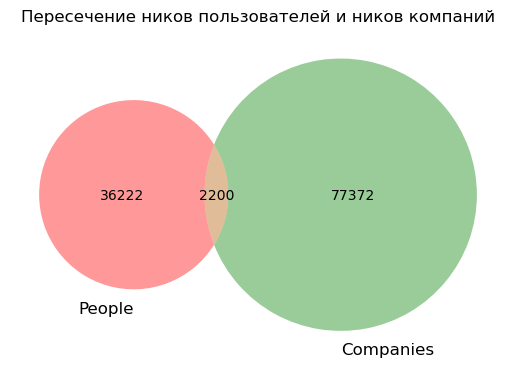

In [60]:
!pip install matplotlib-venn -q
from matplotlib_venn import venn2

venn2([set(people_df['network_username']), set(company_df['network_username'])], set_labels=('People', 'Companies'))

plt.title("Пересечение ников пользователей и ников компаний")
plt.show()   

---

**Выводы о целесообразности объединения датасетов**

В датафрейме `company_df` в столбце `network_username` представлены никнеймы компаний в сети, в датафрейме `people_df` в столбце `network_username` представлены ники сотрудников компаний в социальных сетях. Возможно, какие-то компании были названы по имени людей, но в целом, такое объединение не выглядит перспективно.

Количество пересекающихся записей в датафремах в этих столбцах незначительно, следовательно, их объединение, **нецелесообразно**.

---

###  2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём содержалось много пропусков в информации о раундах, которая заказчику важна. По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

Нобходимо привести данные в удобный вид для проведения дельнейшего анализа. 

In [61]:
company_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id_2,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year_funded
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Судя по данным, содержащимся в датафрейме company_df, можно сделать вывод о том, что датафрейм получен в результате объединения 2 таблиц. Создадим 2 новых датафрейма на базе датафрейма company_df: `df_companies` и `df_rounds`.

In [62]:
df_companies = company_df[['company_id', 'name', 'category_code', 'status', 
                             'founded_at', 'closed_at', 'domain', 
                             'network_username', 'country_code', 
                             'investment_rounds', 'funding_rounds', 
                            'funding_total', 'milestones']]
df_companies.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0


Обработаем данные в датафрейме df_companies: проверим наличие дубликатов и удалим их, отсортируем датафрейм и присвоим новые индексы.

In [63]:
df_companies.duplicated().sum()

21220

In [64]:
df_companies=df_companies.drop_duplicates(subset=['company_id', 'name', 'category_code', 'status', 
                             'founded_at', 'closed_at', 'domain', 
                             'network_username', 'country_code', 
                             'investment_rounds', 'funding_rounds', 
                            'funding_total', 'milestones'], keep='first')

In [65]:
df_companies = df_companies.sort_values(by=df_companies.columns.tolist())
df_companies.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,3.975000e+07,5.0
63280,2.0,AdventNet,enterprise,operating,1996-01-01,NaT,adventnet.com,manageengine,USA,0.0,0.0,0.000000e+00,0.0
153920,3.0,Zoho,software,operating,2005-09-15,NaT,zoho.com,zoho,USA,0.0,0.0,0.000000e+00,5.0
165414,4.0,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,4.500000e+07,8.0
217286,5.0,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.0,11.0,2.425700e+09,5.0


In [66]:
df_companies = df_companies.reset_index(drop=True)
df_companies.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,3.975000e+07,5.0
1,2.0,AdventNet,enterprise,operating,1996-01-01,NaT,adventnet.com,manageengine,USA,0.0,0.0,0.000000e+00,0.0
2,3.0,Zoho,software,operating,2005-09-15,NaT,zoho.com,zoho,USA,0.0,0.0,0.000000e+00,5.0
3,4.0,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,4.500000e+07,8.0
4,5.0,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.0,11.0,2.425700e+09,5.0


Создадим отдельную таблицу `df_rounds` по раундам инвестирования, проверим ее на предмет наличия пропусков в столбце `funding_round_type`, удалим пропуски, отсортируем датафрейм и присвоим новые индексы.

In [67]:
df_rounds = company_df[['company_id_2', 'raised_amount', 'funding_round_id', 
                            'funded_at', 'funding_round_type', 'pre_money_valuation', 
                            'participants', 'is_first_round', 
                            'is_last_round', 'year_funded']]
df_rounds.head()

,company_id_2,raised_amount,funding_round_id,funded_at,funding_round_type,pre_money_valuation,participants,is_first_round,is_last_round,year_funded
0,1.0,5250000.0,888.0,2005-10-01,series-a,0.0,2.0,0.0,1.0,2005.0
1,1.0,9500000.0,889.0,2007-01-01,series-b,0.0,3.0,0.0,0.0,2007.0
2,1.0,25000000.0,2312.0,2008-05-19,series-c+,0.0,4.0,1.0,0.0,2008.0
3,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
display(df_rounds[df_rounds['funding_round_type'].isna()].head()) 

,company_id_2,raised_amount,funding_round_id,funded_at,funding_round_type,pre_money_valuation,participants,is_first_round,is_last_round,year_funded
3,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df_rounds=df_rounds.dropna(subset=['funding_round_type'])
df_rounds

,company_id_2,raised_amount,funding_round_id,funded_at,funding_round_type,pre_money_valuation,participants,is_first_round,is_last_round,year_funded
0,1.0,5250000.0,888.0,2005-10-01,series-a,0.0,2.0,0.0,1.0,2005.0
1,1.0,9500000.0,889.0,2007-01-01,series-b,0.0,3.0,0.0,0.0,2007.0
2,1.0,25000000.0,2312.0,2008-05-19,series-c+,0.0,4.0,1.0,0.0,2008.0
15,1001.0,5000000.0,1644.0,2008-02-26,series-a,0.0,3.0,1.0,1.0,2008.0
20,10014.0,0.0,6682.0,2008-09-01,angel,0.0,1.0,1.0,1.0,2008.0
...,...,...,...,...,...,...,...,...,...,...
217769,282847.0,5500000.0,56454.0,2011-01-31,other,0.0,0.0,1.0,1.0,2011.0
217770,55477.0,10633300.0,56542.0,2011-01-13,venture,0.0,0.0,0.0,1.0,2011.0
217771,55477.0,2125720.0,56543.0,2012-05-31,venture,0.0,0.0,1.0,0.0,2012.0
217772,283492.0,3602480.0,56928.0,2013-12-03,venture,0.0,5.0,1.0,1.0,2013.0


In [70]:
df_rounds = df_rounds.sort_values(by=df_rounds.columns.tolist())
df_rounds.head()

,company_id_2,raised_amount,funding_round_id,funded_at,funding_round_type,pre_money_valuation,participants,is_first_round,is_last_round,year_funded
0,1.0,5250000.0,888.0,2005-10-01,series-a,0.0,2.0,0.0,1.0,2005.0
1,1.0,9500000.0,889.0,2007-01-01,series-b,0.0,3.0,0.0,0.0,2007.0
2,1.0,25000000.0,2312.0,2008-05-19,series-c+,0.0,4.0,1.0,0.0,2008.0
165415,4.0,2800000.0,85.0,2005-10-01,series-a,0.0,8.0,0.0,1.0,2005.0
165417,4.0,5000000.0,24136.0,2011-07-12,series-c+,0.0,0.0,1.0,0.0,2011.0


In [71]:
df_rounds = df_rounds.reset_index(drop=True)
df_rounds.head()

,company_id_2,raised_amount,funding_round_id,funded_at,funding_round_type,pre_money_valuation,participants,is_first_round,is_last_round,year_funded
0,1.0,5250000.0,888.0,2005-10-01,series-a,0.0,2.0,0.0,1.0,2005.0
1,1.0,9500000.0,889.0,2007-01-01,series-b,0.0,3.0,0.0,0.0,2007.0
2,1.0,25000000.0,2312.0,2008-05-19,series-c+,0.0,4.0,1.0,0.0,2008.0
3,4.0,2800000.0,85.0,2005-10-01,series-a,0.0,8.0,0.0,1.0,2005.0
4,4.0,5000000.0,24136.0,2011-07-12,series-c+,0.0,0.0,1.0,0.0,2011.0


---

**Промежуточный вывод о проблемном датасете**


Датасет `company_and_rounds.csv` был создан путем объединения 2 таблиц: с данными о компаниях и с данными о раундах инвестирования.

Для того, чтобы в дальнейшем можно было удобно проводить анализ в разрезе отдельных компаний, датасет был разделен на 2: `df_companies` и `df_rounds`, из датасетов удалены пропуски и датасеты отсортированы по id компании.

---


## Шаг 3. Исследовательский анализ объединённых таблиц




### 3.1. Объединение данных

Для проведения последующего анализа необходимо объединить данные компаний, интересующих заказчика: компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

Из обработанного на предыдущем шаге датасета `company_and_rounds.csv` нужно отобрать те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`.

In [72]:
df_companies_deals = df_companies[(df_companies['funding_rounds'] > 0) | (df_companies['investment_rounds'] > 0) | (df_companies['status'] == 'acquired')]
df_companies_deals.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,3.975000e+07,5.0
3,4.0,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,4.500000e+07,8.0
4,5.0,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.0,11.0,2.425700e+09,5.0
5,7.0,Omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,Nomadesk,ISR,0.0,1.0,8.000000e+05,4.0
6,8.0,Postini,web,acquired,1999-06-02,NaT,postini.com,NaN,USA,0.0,0.0,0.000000e+00,0.0


In [73]:
df_companies_deals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40747 entries, 0 to 196552
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  float64       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 4.4+ MB

In [74]:
df_companies_deals.isna().mean()

company_id           0.000000
name                 0.000000
category_code        0.133310
status               0.000000
founded_at           0.317569
closed_at            0.947775
domain               0.122537
network_username     0.488306
country_code         0.147373
investment_rounds    0.000000
funding_rounds       0.000000
funding_total        0.000000
milestones           0.000000
dtype: float64

---

- В отфильтрованном датасете содержится 40747 записей. В столбце `closed_at` (дата закрытия компании) содержится 94.8% пропусков, значит компания действующая. 
- В столбце `founded_at` (дата основания компании) 31.8% пропусков. Эти пропуски можно заполнить индексом, если понадобится для анализа.
- Пропуски содержатся в столбцах `category_code` (13.3%), `domain` (12.3%), `network_username` (48.8) и `country_code` (14.7%).

---

### 3.2. Анализ выбросов

Необходимо оценить графическим способом, какой размер общего финансирования для одной компании является типичным, а какой — выбивающимся (заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям).

- используем метод describe() и диаграмму размаха

In [75]:
df_companies_deals['funding_mln'] = df_companies_deals['funding_total']/1_000_000
df_companies_deals.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_mln
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,3.975000e+07,5.0,39.75
3,4.0,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,4.500000e+07,8.0,45.00
4,5.0,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.0,11.0,2.425700e+09,5.0,2425.70
5,7.0,Omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,Nomadesk,ISR,0.0,1.0,8.000000e+05,4.0,0.80
6,8.0,Postini,web,acquired,1999-06-02,NaT,postini.com,NaN,USA,0.0,0.0,0.000000e+00,0.0,0.00


In [76]:
df_companies_deals['funding_mln'].describe()

count    40747.00000
mean        10.13561
std         56.46436
min          0.00000
25%          0.00000
50%          0.60000
75%          5.65065
max       5700.00000
Name: funding_mln, dtype: float64

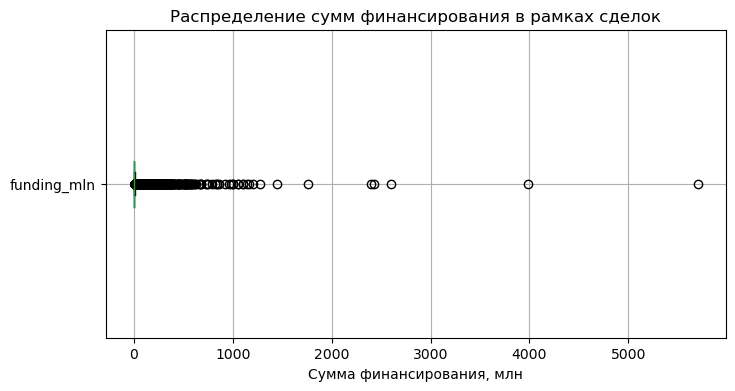

In [77]:
boxplot = df_companies_deals.boxplot(
    column='funding_mln',
    vert=False,
    grid=True,
    figsize=(8, 4))

boxplot.set_title('Распределение сумм финансирования в рамках сделок')
boxplot.set_xlabel('Сумма финансирования, млн')
plt.show()

Полученные данные свидетельствуют об их неравномерном распределении: 
- 25% всех данных - это нулевые значения,
- медиана = 0.6 млн у.е., 
- среднее значение - 10 млн у.е., 
- стандартное отклонение - 56 млн у.е. 

Нулевые значения в столбце с финансированием можно удалить.

Можно добавить в гистограмму ***логарифмическую шкалу***, на которой все значения (и большие и малые) будут равномерно 
распределены на графике, и будут видны выбросы.

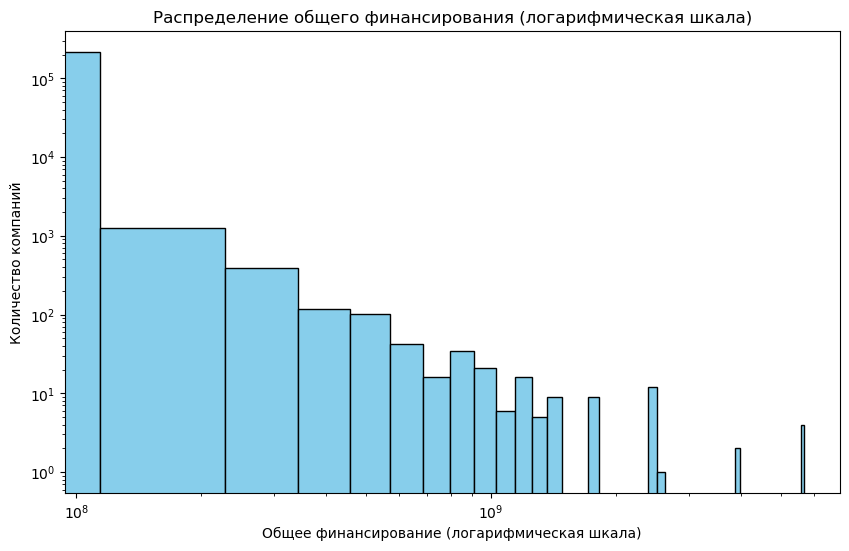

In [78]:
plt.figure(figsize=(10, 6))
plt.hist(company_df['funding_total'], bins=50, color='skyblue', edgecolor='black', log=True)
plt.xscale('log')
plt.xlabel('Общее финансирование (логарифмическая шкала)')
plt.ylabel('Количество компаний')
plt.title('Распределение общего финансирования (логарифмическая шкала)')
plt.show()

Отфильтруем из столбца `funding_mln` нулевые значения, посмотрим статистическое описание после фильтрации и снова построим диаграмму размаха.

In [79]:
df_companies_deals_filtered = df_companies_deals[df_companies_deals['funding_mln'] > 0] 
df_companies_deals_filtered['funding_mln'].describe()

count    27874.000000
mean        14.816520
std         67.759363
min          0.000291
25%          0.500000
50%          2.564500
75%         11.000000
max       5700.000000
Name: funding_mln, dtype: float64

После проведенной фильтрации значения стали следующими:
- медиана равна 2.56 млн у.е., 
- среднее значение - 14.8 млн у.е.,  
- стандартное отклонение увеличилось до 67.8 млн. 

В столбце `funding_mln` есть выбросы, т.к. среднее и медиана значительно отличаются. Выбросы можно проверить графическим способом с использованием диаграммы размаха, чтобы визуально оценить распределение данных.

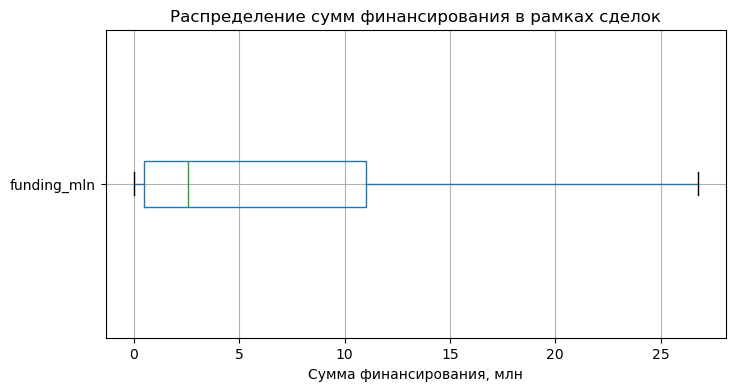

In [80]:
boxplot = df_companies_deals_filtered.boxplot(
    column='funding_mln',
    vert=False,
    grid=True,
    figsize=(8, 4), 
    showfliers=False)

boxplot.set_title('Распределение сумм финансирования в рамках сделок')
boxplot.set_xlabel('Сумма финансирования, млн')
plt.show()

---


Распределение показывает, что типичное финансирование составляет порядка 2.56 млн у.е. (была использована медина, т.к. ввиду неравномерного распределения и наличия выбросов мы не можем использовать среднее значение), средняя сумма финансирования в 75% всех сделок составляет 11 млн у.е., суммы примерно выше 27 млн у.е. являются выбивающимися значениями.

---

### 3.3. Куплены забесплатно?

1. Необходимо исследовать компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

2. Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и проверим, каким процентилям соответствуют границы.

Выполним следующие шаги по первой части:

- объединим датафрейм `df_companies_deals_filtered`, в котором отфильтрованы нулевые значения, и `acquision_df`;
- проведем фильтрацию компаний, которые были проданы за 0 или 1 доллар, и посчитаем их количество;
- посмотрим количество инвестиционных раундов для компаний, которые были куплены за 0 у.е.;
- посмотрим количество раундов финансирования и средний размер финансирования для компаний, которые были куплены за 0 у.е.

In [81]:
df_merged = pd.merge(
    df_companies_deals_filtered,
    acquisition_df,
    how='left',
    left_on='company_id',
    right_on='acquired_company_id'
)

df_merged.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_mln,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,3.975000e+07,5.0,39.75,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,4.500000e+07,8.0,45.00,7386.0,20953.0,4.0,NaN,500000.0,2012-07-12
2,5.0,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.0,11.0,2.425700e+09,5.0,2425.70,NaN,NaN,NaN,NaN,NaN,NaN
3,7.0,Omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,Nomadesk,ISR,0.0,1.0,8.000000e+05,4.0,0.80,NaN,NaN,NaN,NaN,NaN,NaN
4,9.0,Geni,web,acquired,2006-06-01,NaT,geni.com,geni,USA,0.0,3.0,1.650000e+07,4.0,16.50,7954.0,687.0,9.0,NaN,0.0,2012-11-28


In [82]:
df_merged_filtered = df_merged[(df_merged['price_amount'] == 0) | (df_merged['price_amount'] == 1)]
df_merged_filtered.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_mln,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
4,9.0,Geni,web,acquired,2006-06-01,NaT,geni.com,geni,USA,0.0,3.0,16500000.0,4.0,16.50,7954.0,687.0,9.0,NaN,0.0,2012-11-28
6,13.0,StumbleUpon,web,acquired,2002-02-01,NaT,stumbleupon.com,stumbleupon,USA,0.0,4.0,18500000.0,5.0,18.50,4283.0,20.0,13.0,NaN,0.0,2007-05-30
8,14.0,Gizmoz,web,acquired,2003-01-01,NaT,gizmoz.com,NaN,USA,0.0,3.0,18100000.0,4.0,18.10,2692.0,37730.0,14.0,NaN,0.0,2009-12-15
15,23.0,Joost,games_video,acquired,2006-10-01,NaT,joost.com,NaN,USA,0.0,1.0,45000000.0,5.0,45.00,2622.0,3396.0,23.0,NaN,0.0,2009-11-24
26,38.0,Kyte,games_video,acquired,2006-12-01,NaT,kyte.com,kyte,USA,0.0,4.0,23350000.0,2.0,23.35,5075.0,475.0,38.0,NaN,0.0,2011-01-31


In [83]:
df_merged_filtered['price_amount'].value_counts()

price_amount
0.0    1618
Name: count, dtype: int64

In [84]:
df_merged_filtered['investment_rounds'].value_counts().reset_index()

,investment_rounds,count
0,0.0,1609
1,1.0,6
2,2.0,2
3,3.0,1


In [85]:
df_merged_filtered.groupby('funding_rounds').agg(
    count_funding_rounds=('funding_rounds', 'count'),
    mean_funding_mln=('funding_mln', 'median')
).reset_index()

,funding_rounds,count_funding_rounds,mean_funding_mln
0,1.0,828,3.500000
1,2.0,414,7.682910
2,3.0,221,14.695000
3,4.0,94,24.595000
4,5.0,34,31.750000
5,6.0,11,44.700000
6,7.0,9,33.672700
7,8.0,3,32.655000
8,9.0,2,55.846435
9,11.0,1,158.101000


---

Всего 1618 компаний были куплены за 0 у.е. 

Для большинства компаний количество инвестиционных раундов равно 0.

Для большинства компаний характерны 1-3 раунда финансирования с относительно невысоким (по сравнению с остальными компаниями) средним размером финансирования:
- в 828 компаниях был 1 раунд финансирования, средний объем финансирования 3.5 млн у.е.;
- в 414 компаний - 2 раунда финансирования, средний объем финансирования 7.7 млн у.е.;
- в 221 компанийй - 3 раунда финансирования, средний объем финансирования 14.7 млн у.е.;.

В 2 компаниях были 11 и 12 раундов финансирования со средней суммой финансирования 158 млн у.е и 151.8 млн у.е., соответственно.

Возможно, сведения о данных компаниях не являются достоверными. Нецелесообразно продавать компании за 0 у.е., объем финансирования которых измеряется в млн у.е.


---

Выполним следующие шаги по второй части:
- посчитаем границы выбросов для столбца 'funding_total' и границы усов;
- посчитаем долю сделок, сумма которых составила меньше верхней границы выбросов.

In [86]:
q1 = df_companies_deals_filtered['funding_total'].quantile(0.25) 
q3 = df_companies_deals_filtered['funding_total'].quantile(0.75)
iqr =  q3 - q1 

In [87]:
print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr)

Q1: 500000.0
Q3: 11000000.0
IQR: 10500000.0


In [88]:
нижний_ус = q1 - 1.5*iqr
верхний_ус = q3 + 1.5*iqr

In [89]:
print("Верхний порог выбросов:", верхний_ус)
print("Нижний порог выбросов:", нижний_ус)

Верхний порог выбросов: 26750000.0
Нижний порог выбросов: -15250000.0


In [90]:
filtered_count = df_companies_deals_filtered[df_companies_deals_filtered['funding_total'] <= 26_750_000].shape[0]
total_count = len(df_companies_deals_filtered['funding_total'])
percentage = filtered_count / total_count
percentage

0.8755829805553562

---

- 1618 компаний были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.
- Верхний порог финансирования равен 26 750 000 у.е., т.е. выше этой суммы - выбросы.
- 87.6% сделок имеют сумму финансирования менее 26 750 000 у.е.

---

### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов необходимо выделить категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Выполним следующие шаги:

- посчитаем, для каких категорий характерны самые высокие средние цены покупки стартапов и наибольший разброс цен;
- отфильтруем категории, в которых сумма финансирования выше некоего условного среднего значения;
- выделим катеории, для которых характерен наибольший разброс цен;
- отфильтруем категории с наибольшим разбросом цен за стартап.

In [91]:
categories = df_companies_deals_filtered.groupby('category_code', observed=True) \
    .agg({'funding_mln': 'median'}) \
    .sort_values('funding_mln', ascending=False) \
    .reset_index() \
    .rename(columns={'funding_mln':'funding_median'})
categories.head(20)

,category_code,funding_median
0,semiconductor,12.85000
1,cleantech,9.00000
2,nanotech,7.50000
3,medical,6.75100
4,biotech,6.30000
5,network_hosting,6.25000
6,security,5.50000
7,public_relations,4.50500
8,enterprise,4.33250
9,finance,3.66000


In [92]:
categories[categories['funding_median'] > 2.56]

,category_code,funding_median
0,semiconductor,12.85000
1,cleantech,9.00000
2,nanotech,7.50000
3,medical,6.75100
4,biotech,6.30000
5,network_hosting,6.25000
6,security,5.50000
7,public_relations,4.50500
8,enterprise,4.33250
9,finance,3.66000


In [93]:
categories_std = df_companies_deals_filtered.groupby('category_code', observed=True) \
    .agg({'funding_mln': 'std'}) \
    .sort_values(('funding_mln'), ascending=False) \
    .reset_index() \
    .rename(columns={'funding_mln':'funding_std'})
categories_std.head(20)

,category_code,funding_std
0,automotive,200.143944
1,mobile,165.615074
2,social,119.027789
3,health,111.965240
4,manufacturing,101.885221
5,nanotech,99.650533
6,cleantech,98.191088
7,public_relations,74.507501
8,network_hosting,72.978462
9,government,65.852277


In [94]:
categories_std[categories_std['funding_std'] > 100]

,category_code,funding_std
0,automotive,200.143944
1,mobile,165.615074
2,social,119.027789
3,health,111.965240
4,manufacturing,101.885221


---

**Для 15 категорий стартапов характеры цены выше средней цены** в размере 2.56 млн у.е.:
- semiconductor: самая высокая средняя цена - 12.85 млн у.е.;
- cleantech, nanotech, medical, biotech, network_hosting, security: 5.5-9 млн у.е.;
- public_relations, enterprise, finance, manufacturing, hardware, analytics, advertising, automotive: 2.83-4.5 млн у.е.


**Для 5 категорий стартапов характерны очень высокие значения разброса цен за стартап:**
1. automotive: 200 млн у.е.
2. mobile:	165.6 млн у.е.
3.	social:	119 млн у.е.
4.	health:	112 млн у.е.
5.	manufacturing:	101.9 млн у.е.

---

### 3.5. Сколько раундов продержится стартап перед покупкой

Необходимо определить типичное значение количества раундов для каждого возможного статуса стартапа на основе столбца `funding_rounds`:

- отфильтруем компании, у которых больше 0 раундов финансирования;
- посчитаем среднее количество раундов финансирования для каждого статуса компании;
- построим линейчатую диаграмму для отображения среднего числа раундов финансирования.

In [95]:
startups_rounds_nonzero = df_companies_deals[df_companies_deals['funding_rounds'] > 0]
startups_rounds_nonzero.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_mln
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,3.975000e+07,5.0,39.75
3,4.0,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,4.500000e+07,8.0,45.00
4,5.0,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.0,11.0,2.425700e+09,5.0,2425.70
5,7.0,Omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,Nomadesk,ISR,0.0,1.0,8.000000e+05,4.0,0.80
7,9.0,Geni,web,acquired,2006-06-01,NaT,geni.com,geni,USA,0.0,3.0,1.650000e+07,4.0,16.50


In [96]:
startups_rounds_avg = startups_rounds_nonzero.groupby('status')['funding_rounds'].mean().sort_values(ascending=True)
startups_rounds_avg

status
closed       1.383437
operating    1.642359
acquired     1.896645
ipo          2.526531
Name: funding_rounds, dtype: float64

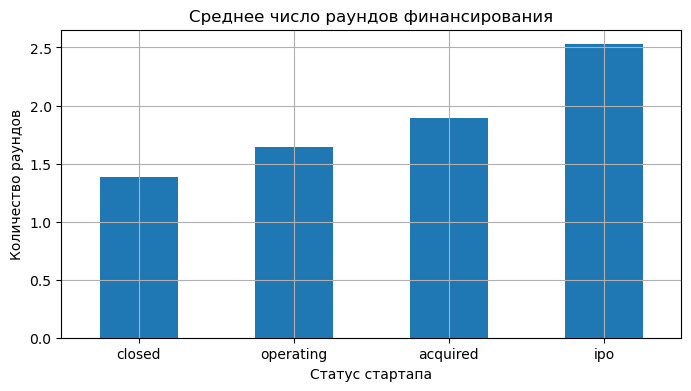

In [97]:
startups_rounds_avg.plot(
    kind='bar', 
    figsize=(8, 4),
    title='Среднее число раундов финансирования',
    legend=False,
    xlabel='Статус стартапа',
    ylabel='Количество раундов',
    grid=True,
    rot=0
)
plt.show()

---

Для стартапов характерно среднее количество раундов финансирования:

- closed - 1.38;
- operating - 1.64;
- acquired - 1.9;
- ipo - 2.53.

Т.е. часть стартапов закрывается на 2 раунде финансирования, часть из них продолжает работать и часть продается. На 3 этапе часть стартапов выходит на ipo.

---


## Шаг 4. Итоговый вывод и рекомендации


В ходе исследования были проанализированы данные о покупке и продаже стартапов на основе 5 датасетов. Данные включали информацию о компаниях и их статусе, датах, раундах и суммах финансирования, сотрудниках компаний и их образовании. 
- Основная цель исследования: проанализировать данные, сделать выводы об их достоверности и выяснить, можно ли использовать эти данные для построение прогнозов.


### 4.1. Общий обзор проделанной работы

На этапе **предобработки данных** были сделаны следующие выводы:

- Не всегда целесообразно объединять датафреймы даже при наличии столбца с частично пересекающимися данными.
- Объединенные таблицы могут иметь большое количество пропусков и быть неудобными для проведения анализа, поэтому их лучше разбить на исходные таблицы (на примере датасета company_and_rounds.csv).  

**Исследовательский анализ** позволил сделать следующие выводы:

- ***Средний размер финансирования*** в рамках одного раунда ***был максимальным в 2005 году*** и составил 5_500_000 у.е., в 2004 и в 2006 годах он составил 5_000_000 у.е. В 2013 году наблюдалось максимальное количество раундов финансирования - 11072, средний размер финансирования составил 1_200_000 (один из самых низких показателей). После пика в 2005 году наблюдалось снижение среднего размера финансирования.

- Примерно ***2/3 всех анализируемых компаний состоят из 1 сотрудника*** (14_150 компаний). Такие компании характеризуются самым низким показателем наличия сведений об образовании сотрудников (40.8%).
- В 4735 компаниях в штате 2 сотрудника, в 1857 компаниях - 3 сотрудника. В компаниях с 2-3 сотрудниками доля сотрудников с образованием составляет 77%.
- В компаниях от 4 до 25 человек доля образованного персонала составляет от 68.8% до 72.4%.
- ***Самый высокий показатель наличия сведений об образовании сотрудников характерен для крупных компаний*** с численностью сотрудников более 26 человек: 79.5%.

- В исследуемых данных ***40_747 компаний получили финансирование***, или для них были зафиксированы инвестиционные раунды, или они были куплены. После изучения распределения было обнаружено, что ***25% компаний имели нулевое финансирование***. Эти компании были отфильтрованы и в дальнейшем рассматривались 27874 компаний, для которых были сделаны следующие выводы:
    - типичная средняя сумма финансирование для стартапов составила 2.56 млн у.е.;
    - средняя сумма финансирования в 75% всех сделок составила 11 млн у.е.:
    - суммы выше 26,7 млн у.е. являются выбивающимися значениями.
    
- ***87.6% сделок имели сумму финансирования менее 26_750_000 у.е.***
    
- ***1618 компаний были куплены за 0 у.е.*** Для большинства этих компаний количество инвестиционных раундов равно 0. Для большинства компаний характерны 1-3 раунда финансирования с относительно невысоким (по сравнению с остальными компаниями) средним размером финансирования:
    - в 828 компаниях был 1 раунд финансирования, средний объем финансирования 3.5 млн у.е.;
    - в 414 компаний - 2 раунда финансирования, средний объем финансирования 7.7 млн у.е.;
    - в 221 компаний - 3 раунда финансирования, средний объем финансирования 14.7 млн у.е.;.
    - в 2 компаниях были 11 и 12 раундов финансирования со средней суммой финансирования 158 млн у.е и 151.8 млн у.е., соответственно.
    Возможно, сведения о данных компаниях не являются достоверными. 
    
- Для ***15 категорий стартапов характеры цены выше средней цены в размере 2.56 млн у.е.:***
    - semiconductor: самая высокая средняя цена - 12.85 млн у.е.;
    - cleantech, nanotech, medical, biotech, network_hosting, security: 5.5-9 млн у.е.;
    - public_relations, enterprise, finance, manufacturing, hardware, analytics, advertising, automotive: 2.83-4.5 млн у.е.

- Для ***5 категорий стартапов характерны очень высокие значения разброса цен за стартап:***

    - automotive: 200 млн у.е.
    - mobile: 165.6 млн у.е.
    - social: 119 млн у.е.
    - health: 112 млн у.е.
    - manufacturing: 101.9 млн у.е.
    
- Часть стартапов закрывается на 1 раунде финансирования, часть из них продолжает работать и часть продается. На 3 этапе часть стартапов выходит на ipo.


### 4.2. Рекомендации на основе анализа данных

Если инвестиционная компания имеет планы для вхождения на рынок купли-продажи стартапов с целью развития перспективных стартапов, она должна принимать во внимание факт того, что большинство стартапов представлены компаниями, состоящими из 1 человека. Такие компании характеризуются низким процентом наличия образования у сотрудников. 


Рынок может быть достаточно перспективным. Нужно будет проводить текущий анализ стартапов, чтобы понимать, какие стартапы нежизнеспособны и могут быть закрыты, какие могут развиваться. Часть стартапов развивается и выходит на ipo. Можно рассматривать инвестиции в стартапы с количеством работников более 1 человека. Для таких компаний характерен более высокий процент образованности сотрудников. 

Также можно рассматривать как возможность для инвестиций высокотехнологичные отрасли: automotive, mobile, manufacturing, semiconductor, cleantech, nanotech, medical, biotech, network_hosting, security, которые характеризуются ценами с уровнем выше среднего или разбросом цен, для привлечения рискованных инвесторов. 
